In [28]:
#Q 1---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

data = pd.read_csv('loans_full_schema.csv')


In [38]:
m= data.isnull().sum()
print("missing",m)

missing state                           0
homeownership                   0
annual_income                   0
verified_income                 0
delinq_2y                       0
earliest_credit_line            0
inquiries_last_12m              0
total_credit_lines              0
open_credit_lines               0
total_credit_limit              0
total_credit_utilized           0
num_collections_last_12m        0
num_historical_failed_to_pay    0
current_accounts_delinq         0
total_collection_amount_ever    0
current_installment_accounts    0
accounts_opened_24m             0
num_satisfactory_accounts       0
num_accounts_30d_past_due       0
num_active_debit_accounts       0
total_debit_limit               0
num_total_cc_accounts           0
num_open_cc_accounts            0
num_cc_carrying_balance         0
num_mort_accounts               0
account_never_delinq_percent    0
tax_liens                       0
public_record_bankrupt          0
loan_purpose                    0
applic

In [37]:
data = data.dropna(axis=1)
data.head()

,state,homeownership,annual_income,verified_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,NJ,MORTGAGE,90000.0,Verified,0,2001,6,28,10,70795,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,HI,RENT,40000.0,Not Verified,0,1996,1,30,14,28800,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,WI,RENT,40000.0,Source Verified,0,2006,4,31,10,24193,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,PA,RENT,30000.0,Not Verified,0,2007,0,4,4,25400,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,CA,RENT,35000.0,Verified,0,2008,7,22,16,69839,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [43]:



# Encode categorical variables
categorical_features = ['state', 'homeownership', 'verified_income', 'loan_purpose', 
                        'application_type', 'term', 'grade', 'sub_grade', 
                        'issue_month', 'initial_listing_status', 'disbursement_method']
numeric_features = [col for col in data.select_dtypes(include=['float64', 'int64']).columns if col != 'loan_status']



In [ ]:

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=0))
])

# Define features and target
X = data.drop(columns='loan_status')
y = data['loan_status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'ROC-AUC: {roc_auc}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [21]:
#Q 2
data = pd.read_csv('hospital_readmissions.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [22]:
data.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [23]:

c=['diag_1','diag_2','diag_3','glucose_test', 'A1Ctest',   'change', 'diabetes_med' ]
data.drop(columns=c, inplace=True)


In [7]:
data.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,no
1,[70-80),3,34,2,13,0,0,0,Other,no
2,[50-60),5,45,0,18,0,0,0,Missing,yes
3,[70-80),2,36,0,12,1,0,0,Missing,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,no


In [25]:
# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(data[['medical_specialty']])

# Convert to DataFrame for better readability
encoded_data = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['medical_specialty']))
data_encoded = pd.concat([data.drop(columns=['medical_specialty']), encoded_data], axis=1)


In [26]:
numerical_cols = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']

# Standardize numerical columns
scaler = StandardScaler()
scaled_array = scaler.fit_transform(data[numerical_cols])
scaled_data = pd.DataFrame(scaled_array, columns=numerical_cols)

# Combine standardized numerical data and one-hot encoded data with the rest of the DataFrame
data_encoded_scaled = pd.concat([data.drop(columns=numerical_cols + ['medical_specialty']), scaled_data, encoded_data], axis=1)


In [30]:
data_encoded_scaled['readmitted'] = data_encoded_scaled['readmitted'].map({'no': 0, 'yes': 1})
X = data_encoded_scaled.drop(columns=['readmitted', 'age'])  
y = data_encoded_scaled['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Precision: 0.64
Recall: 0.39
F1-score: 0.48


In [33]:
#Q 3
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('mnist_train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


Accuracy: 0.87


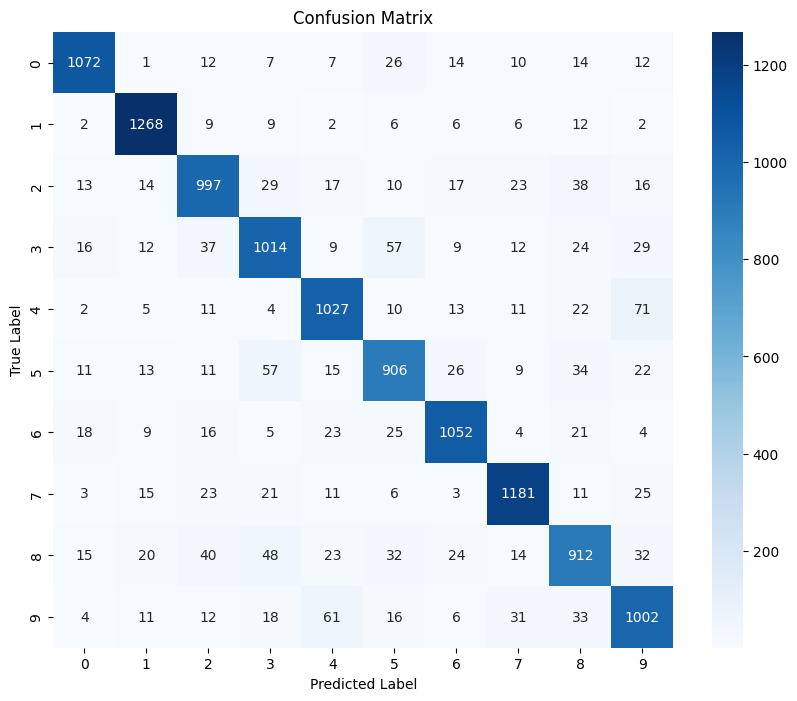

In [34]:
X = data.drop(columns=['label'])
y = data['label']

# Normalize pixel values (0-255 to 0-1)
X = X / 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [35]:
#Q 4

data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [41]:
m= data.isnull().sum()
print("missing",m)

missing Gender               13
Married               3
Dependents           15
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
dtype: int64


In [40]:
data = data.drop(columns=['Education', 'Self_Employed'])

In [72]:
data_encoded = pd.get_dummies(data, columns=['Gender', 'Married'])

In [75]:
m= data_encoded.isnull().sum()
print("missing",m)

missing Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
Gender_Female        0
Gender_Male          0
Married_No           0
Married_Yes          0
dtype: int64


In [82]:
data_encoded['Dependents'] = pd.to_numeric(data_encoded['Dependents'], errors='coerce')

# Fill NaN values in 'Dependents' with the mode
mode_dependents = data_encoded['Dependents'].mode()[0]
data_encoded['Dependents'] = data_encoded['Dependents'].fillna(mode_dependents)

In [79]:
data_encoded['Loan_Status'] = data_encoded['Loan_Status'].map({'Y': 1, 'N': 0})


In [84]:
# Standardize the numerical features
numerical_columns = data_encoded.columns.difference(['Loan_Status'])
scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

In [86]:
# Separate features and target
X = data_encoded.drop('Loan_Status', axis=1)
y = data_encoded['Loan_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Model Evaluation:
Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]


In [85]:
m= data_encoded.isnull().sum()
print("missing",m)

missing Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
Gender_Female        0
Gender_Male          0
Married_No           0
Married_Yes          0
dtype: int64


In [87]:
|

SyntaxError: invalid syntax (525519296.py, line 1)